**Exploratory Data Analysis**

In [1]:
#importing neccessary libraries
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
#import sklearn packages for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
ps = PorterStemmer()
lmtz=WordNetLemmatizer()
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\als7aba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\als7aba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\als7aba\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\als7aba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#importing the dataset
df = pd.read_csv("D:\Data_analytics(project)\data_spam.csv",encoding = "ISO-8859-1")

In [3]:
#check the 5 the shape of the dataset
print(df.head())
df.shape

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


(5572, 5)

In [4]:
#getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#Converting it into DataFrame
df = pd.DataFrame(df)

#check the number of unique values in the dataset
df.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

In [6]:
#droping the duplicates
df.drop_duplicates(inplace = True)
df.shape

(5169, 5)

In [7]:
#droping last 3 columns
df.drop(df.columns[[2, 3, 4]], axis=1, inplace=True)

In [8]:
df.rename(columns={'v1':'label','v2': 'message'},inplace = True)

In [9]:
#checking mssing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [10]:
#label 'spam' as 1 , label 'ham' as 0
df.loc[df['label'] == 'spam', 'label',] = 1
df.loc[df['label'] == 'ham', 'label',] = 0

In [11]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#checking number of hams & spams
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

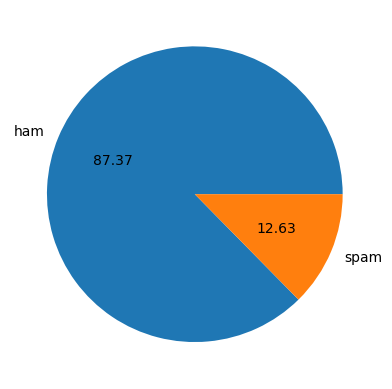

In [13]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [14]:
#adding 'num_character' column
df['num_character'] = df['message'].apply(len)
#adding 'num_words' column
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,label,message,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


<Axes: xlabel='num_character', ylabel='Count'>

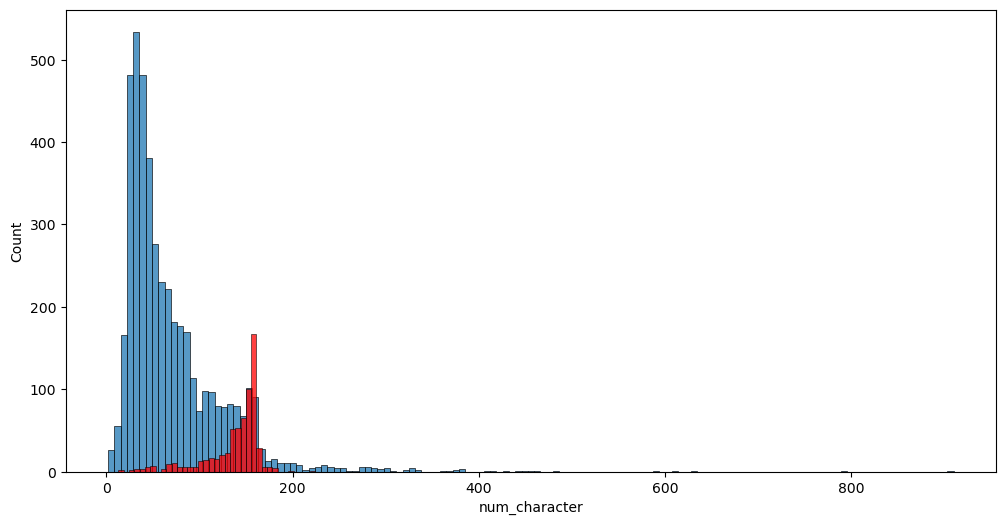

In [15]:
#histplot show the number of character in ham & spam messages
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_character'])
sns.histplot(df[df['label'] == 1]['num_character'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

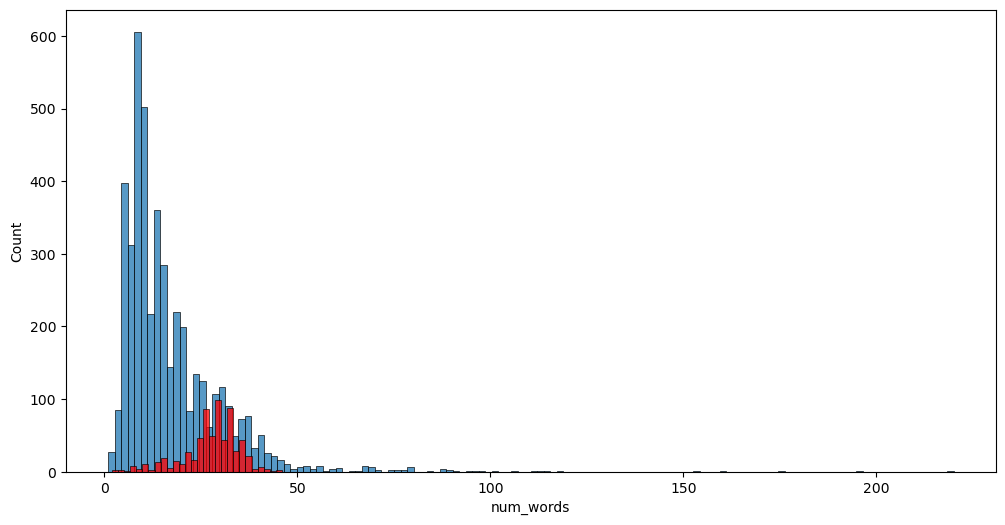

In [16]:
#histplot show the number of words in ham & spam messages
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'], color='red')

In [17]:
#creating a function the apply text_tokenizing & removing special characters, panctuations, stopwords
def text_trans(text):
    #converting the message to lowercase
    text = text.lower()
    
    #tokenize the message
    text = nltk.word_tokenize(text)
    
    y = []
    #lemmatization
    for i in text:
        y.append(lmtz.lemmatize(i))
    
    #remving special characters
    text = y[:]
    y.clear()
    
    for j in text:
        if j.isalnum():
            y.append(j)
    text = y[:]
    y.clear()
    
    #removing panctuation and stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    #stemming the message
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)  


In [18]:
#creating 'transformed_message' column 
df['transformed_message'] = df['message'].apply(text_trans)

In [19]:
#nltk.download('wordnet')
#checking the dataset
df.head()

,label,message,num_character,num_words,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah think go usf life around though


In [20]:
#bag of words for spam messages
spam_word_list = []
for i in df[df['label'] == 1]['transformed_message'].tolist():
    for word in i.split():
        spam_word_list.append(word)

In [21]:
#bag of words for ham messages
ham_word_list = []
for i in df[df['label'] == 0]['transformed_message'].tolist():
    for word in i.split():
        ham_word_list.append(word)
       

In [22]:
#checking the number of spam & ham words
print("number of spam words: " + f"{len(spam_word_list)}")
print("number of ham words: " + f"{len(ham_word_list)}")

number of spam words: 9962
number of ham words: 35693


In [23]:
#count most common repeted words and put it into DataFrame
spam_df = pd.DataFrame(Counter(spam_word_list).most_common(30))
ham_df = pd.DataFrame(Counter(ham_word_list).most_common(30))

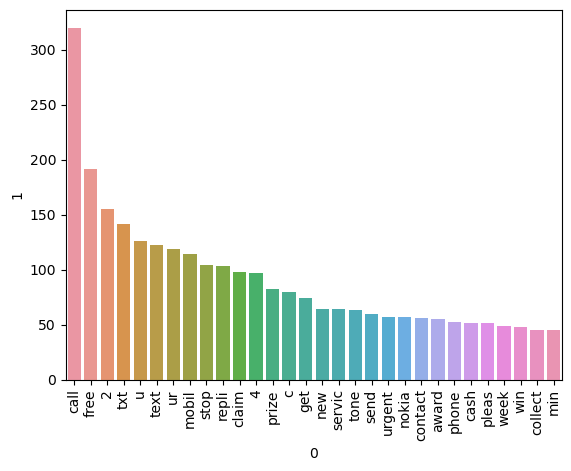

In [24]:
sns.barplot(x=spam_df[0], y=spam_df[1])
plt.xticks(rotation = 'vertical')
plt.show()

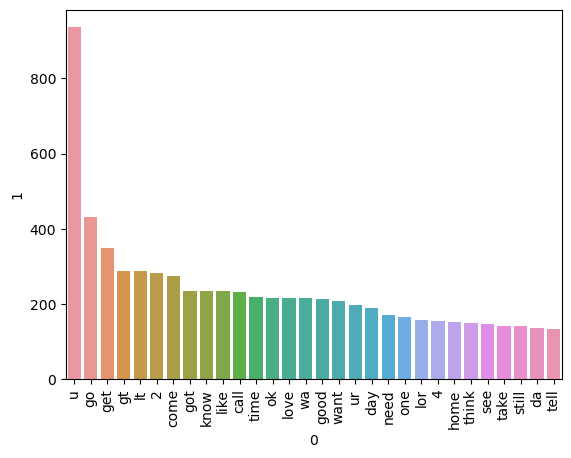

In [25]:
sns.barplot(x=ham_df[0], y=ham_df[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [27]:
X= tfidf.fit_transform(df['transformed_message']).toarray()

In [28]:
y = df['label'].values.astype('int')

In [29]:
X.shape

(5169, 3000)

In [52]:
#split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [53]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
Gaussian = GaussianNB()
Multinomial = MultinomialNB()
Bernoulli = BernoulliNB()

In [67]:
Gaussian.fit(X_train,y_train)
y_pred1 = Gaussian.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.868522815158546
[[986 155]
 [ 15 137]]
0.4691780821917808


In [68]:
Multinomial.fit(X_train,y_train)
y_pred2 = Multinomial.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9876256767208044
[[1140    1]
 [  15  137]]
0.9927536231884058


In [69]:
Bernoulli.fit(X_train,y_train)
y_pred3 = Bernoulli.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9891724671307038
[[1138    3]
 [  11  141]]
0.9791666666666666
